# Operators Module

Operators represent a mathematical object: a unitary matrix. These objects represents physical observables.

In qiskit, these are represented by classes. The most important classes are Pauli class, SparsePauliOp class and operator class.

In [1]:
import numpy as np
from qiskit.quantum_info.operators import Operator, Pauli, SparsePauliOp

## Pauli Class

Pauli class represents a single Pauli string (from set {I,X,Y,Z}) with a optional phase coefficient ({1,i,-1,-i}).

In [5]:
#for simple Pauli matrix: X = {{0,1},{1,0}}
op1 = Pauli("X")
print(op1.to_matrix())

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [7]:
#for a bigger string of Pauli matrices: Ex: XY (tensor product of X and Y Pauli matrices)
op2 = Pauli("XY")
print(op2.to_matrix())

[[0.+0.j 0.+0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]]


There are several ways to intialise the Pauli operator. The above mentioned one is called string representation. The other ways are Array representation, matrix operator representation, and date representation.

## SparsePauliOp class

The SparsePauliOp class represents a linear combination of Pauli strings. As in the case of pauli class, one can intialise SparsePauliOp in many ways. The easiest way is to use the "from_sparse_list" method, where "from_sparse_list" is triplet with (paulistring, qubitindices, coefficient). For example, if triplet is (XX,[1,2],i), it means the operator is "iIXX".

In [9]:
op1 = SparsePauliOp.from_sparse_list([("XZ",[1,4],2),("YZ",[0,3],2j)],num_qubits = 5)
op1

SparsePauliOp(['ZIIXI', 'IZIIY'],
              coeffs=[2.+0.j, 0.+2.j])

If we have pauli strings of same dimensions, one can use "from_list" instead of "from_sparse_list".

In [11]:
#for a operator of form op2 = 0.5 ZI + 0.7 XX + 0.2 XY
op2 = SparsePauliOp.from_list([("ZI",0.5),("XX",0.7),("XY",0.2)])
op2

SparsePauliOp(['ZI', 'XX', 'XY'],
              coeffs=[0.5+0.j, 0.7+0.j, 0.2+0.j])

## Operator Class

Operator class represents a general linear operator. One can easily initialize the operator by directly passing a numpy array storing matrix.  

In [12]:
X = Operator(np.array([[0,1],[1,0]]))
X

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


One can also convert a quantum circuit or gate into a operator by just passing it to Operator() function.

In [13]:
#for Pauli class object
pauliXY = Pauli("XY")
Operator(pauliXY)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
          [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
          [0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
          [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [14]:
#for gate 
from qiskit.circuit.library import XGate
Operator(XGate())

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [15]:
#for a quantum circuit
from qiskit.circuit import QuantumCircuit

qc = QuantumCircuit(1)
qc.h(0)

Operator(qc)

Operator([[ 0.70710678+0.j,  0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))


As operators are unitary matrices, one can easily add them to circuits.

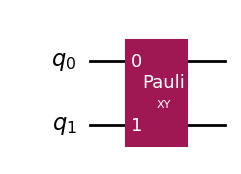

In [20]:
#adding XY to a qc circuit
qc = QuantumCircuit(2)
qc.append(pauliXY,[0,1])
qc.draw("mpl")

As the operators are matrices in representation, one can do the vector algebra on them like tensor product, matrix multiplication, linear combinations and so on.

In [24]:
#Tensor product of X and Y pauli matrices

A = Operator(Pauli("X"))
B = Operator(Pauli("Y"))

print(A.tensor(B))

#The above one is same as XY 

C = Operator(Pauli("XY"))

print(C)

#To compare
C == A.tensor(B)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
          [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
          [0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
          [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
Operator([[0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
          [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
          [0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
          [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


True

In [27]:
#Linear combinations: It does not preserve unitarity

op = 0.2 * ( A + 3*B)
op

Operator([[0. +0.j , 0.2-0.6j],
          [0.2+0.6j, 0. +0.j ]],
         input_dims=(2,), output_dims=(2,))
